In [1]:
import pandas as pd

url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"

# Read the data directly
df = pd.read_csv(url)

# Save it to a CSV file
df.to_csv("bike_sharing.csv", index=False)

print("✅ File saved as bike_sharing.csv")


✅ File saved as bike_sharing.csv


#  Problem Statement — Yulu Bike Sharing Case Study

**About Yulu:**
Yulu is India’s leading micro-mobility service provider that offers shared electric cycles for daily commuting. The company aims to reduce traffic congestion and pollution while promoting sustainable urban transportation.

Recently, Yulu has observed a decline in its revenues. To identify potential causes, the company wants to understand **which factors affect the demand for shared electric cycles** in the Indian market.

---

###  **Objective / Goal**

1. **Identify significant variables** that impact the demand (rental count) for Yulu bikes.  
2. **Quantify how well** these variables explain variations in demand.  
3. Use **statistical hypothesis testing** to validate relationships between variables.

---

### **Dataset Description**

| Column | Description |
|:--|:--|
| datetime | Date and time of observation |
| season | 1: spring, 2: summer, 3: fall, 4: winter |
| holiday | Whether the day is a holiday or not |
| workingday | 1 if it’s a working day, 0 otherwise |
| weather | Weather condition (1–4 scale) |
| temp | Actual temperature (°C) |
| atemp | “Feeling” temperature (°C) |
| humidity | Percentage of humidity |
| windspeed | Wind speed |
| casual | Number of casual users |
| registered | Number of registered users |
| count | Total rental count (target variable) |

---

###  **Business Questions**

1. Does the **working day** have an effect on the number of cycles rented?  
   → (Use **Two-sample t-test**)

2. Are the **number of cycles rented** similar or different across **seasons**?  
   → (Use **One-way ANOVA test**)

3. Are the **number of cycles rented** similar or different across **weather conditions**?  
   → (Use **One-way ANOVA test**)

4. Is **weather dependent on season**?  
   → (Use **Chi-square test of independence**)

---

###  **Expected Outcomes**

- Identify which factors significantly affect bike demand.  
- Generate actionable insights for Yulu to improve utilization and revenue.  
- Develop statistical reasoning and support data-driven decision-making.

---

###  **Concepts Used**
- Bi-variate Analysis  
- 2-Sample t-Test  
- ANOVA  
- Chi-square Test  


# Data Import & EDA Setup

#  Step 2: Data Import & Exploratory Data Analysis (EDA)

In this section, we will:
- Import the dataset into Python using **pandas**  
- Check the structure, shape, and data types of all variables  
- Detect missing values, if any  
- Get an overview of the data using `.info()` and `.describe()`  
- Convert categorical variables (like season, weather, workingday) into category type (if required)  

This is the first step to understand how the data looks before we perform hypothesis testing.


In [2]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To show plots inside notebook
%matplotlib inline

# Load the dataset from URL
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"
df = pd.read_csv(url)

# Display first few rows
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Shape of dataset
print("Shape of dataset:", df.shape)

# Column data types and non-null counts
print("\nDataset Information:")
df.info()

# Statistical summary for numerical columns
print("\nSummary Statistics:")
df.describe().T


Shape of dataset: (10886, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [4]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [5]:
# Convert categorical columns to category dtype
categorical_cols = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


###  Quick Summary of EDA Output

- The dataset has **10,886 rows and 12 columns**, containing both **categorical** and **numerical** variables.  
- There are **no missing values**, and all columns are complete.  
- Categorical variables include `season`, `holiday`, `workingday`, and `weather`.  
- Numerical variables such as `temp`, `humidity`, and `count` show reasonable ranges and variation, indicating good data quality for analysis.


# **Step 3: Univariate Analysis (distribution of numerical & categorical variables)**

Step 3.1 — Univariate Analysis

#  Step 3.1: Univariate Analysis

In this step, we explore **each variable individually** to understand its distribution, range, and possible outliers.

- For **numerical variables**, we’ll use histograms with density curves.
- For **categorical variables**, we’ll use count plots (bar plots).
- We’ll also interpret what each graph tells us about the data.


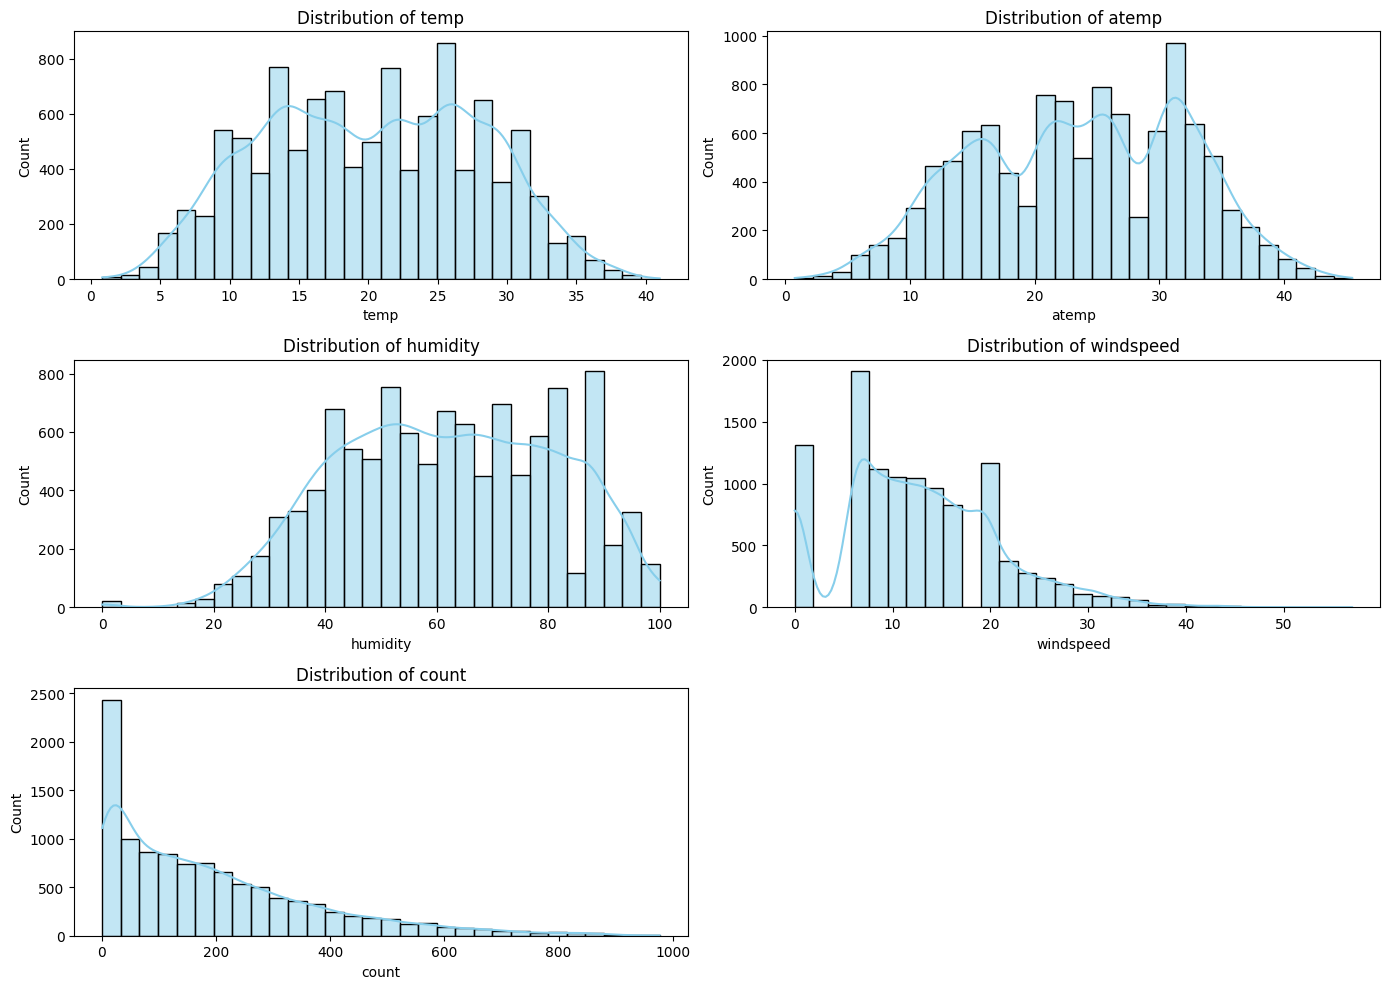

In [7]:
# Continuous variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


###  Observations — Continuous Variables

- **Temperature (temp)** and **Feeling Temperature (atemp)** both show roughly bell-shaped distributions (slightly right-skewed).  
  → Most bike rides occur in pleasant weather between **15–30 °C**.  

- **Humidity** is spread between **40–80 %**, showing moderate variation.  
  → Extremely humid or very dry conditions are rare.  

- **Windspeed** is highly right-skewed — most rides happen when the windspeed is low.  
  → High windspeed days are uncommon and likely reduce bike usage.  

- **Count (Total Rentals)** is strongly right-skewed — most hours have fewer rentals, with a few high-demand spikes.  
  → Suggests that peak rentals occur only during specific times (like office rush hours).  

 Overall, the continuous variables show reasonable variation and no extreme outliers.  
Next, we’ll visualize **categorical variables** such as season, weather, and workingday.


**Step 3.2 — Categorical Variables**

/tmp/ipython-input-2380889129.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-2380889129.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-2380889129.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-2380889129.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=

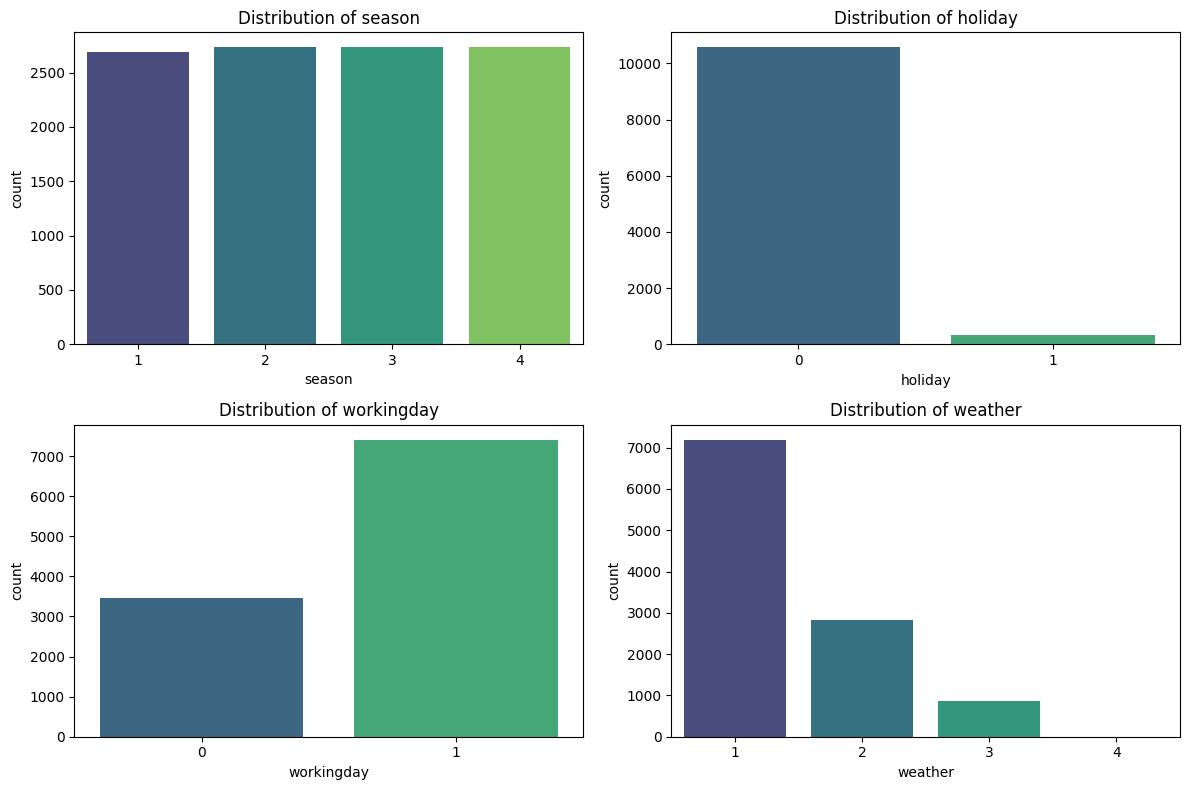

In [8]:
# Categorical variables
cat_cols = ['season', 'holiday', 'workingday', 'weather']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


###  Observations — Categorical Variables

- **Season:**  
  Data is evenly distributed across all four seasons (Spring, Summer, Fall, Winter).  
  → This means the dataset represents all seasons fairly well, ensuring balanced analysis.

- **Holiday:**  
  Very few holidays are recorded — most days are **non-holidays**.  
  → This indicates most rentals happen on regular working days.

- **Workingday:**  
  Around **68% of days are working days (1)** and 32% are weekends or holidays (0).  
  → Suggests Yulu bike demand is likely higher during weekdays (commuting pattern).

- **Weather:**  
  Most rides occur when the weather is **clear or partly cloudy (weather = 1)**.  
  → Very few rides in bad weather (rain, snow, or mist).  
  → This shows that people avoid riding in poor weather conditions.

 **No category imbalance** — all categorical features are properly represented,  
and the data seems realistic and ready for deeper relationship analysis.


# **Step 4: Bivariate Analysis**

# Step 4: Bivariate Analysis

In this step, we study the **relationship between two variables** —  
especially how different factors (like workingday, weather, season) affect the demand (`count`) of Yulu bikes.

We'll use:
- **Boxplots** → to compare distributions across groups  
- **Correlation heatmaps** → to see linear relationships between numerical variables


**Step 4.1 — Relationship Between Continuous Variables**

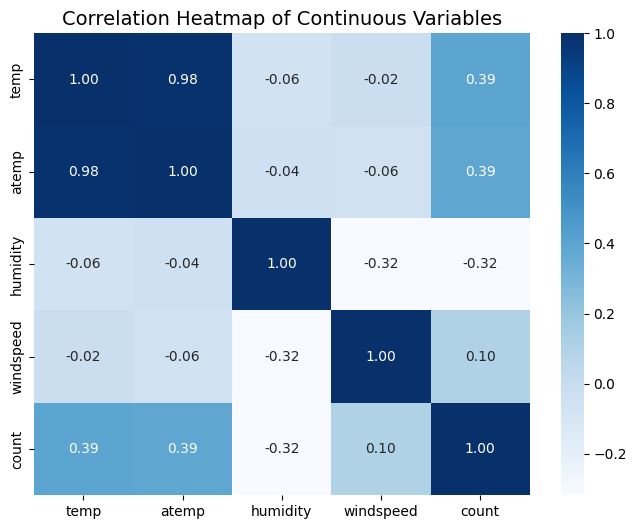

In [10]:
# Continuous variables vs target
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Continuous Variables", fontsize=14)
plt.show()


###  Observation
Temperature (`temp` and `atemp`) shows a **strong positive correlation (0.39)** with bike demand (`count`),  
while **humidity (-0.32)** has a weak negative effect and **windspeed (0.10)** has almost no impact on rentals.


**Step 4.2 — Relationship Between Categorical Variables and Target**

/tmp/ipython-input-2112721803.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='count', data=df, palette='Set2')
/tmp/ipython-input-2112721803.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='count', data=df, palette='Set2')
/tmp/ipython-input-2112721803.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='count', data=df, palette='Set2')


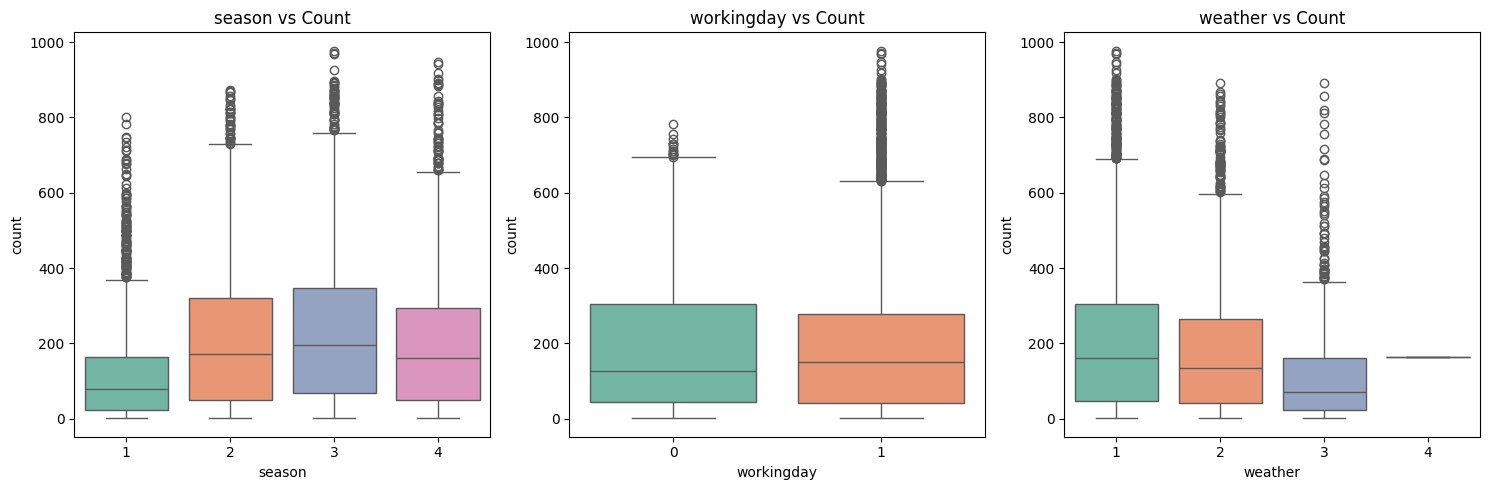

In [11]:
# List of categorical columns
cat_cols = ['season', 'workingday', 'weather']

plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=col, y='count', data=df, palette='Set2')
    plt.title(f"{col} vs Count")
plt.tight_layout()
plt.show()


###  Observation
- **Season:** Rentals are highest in **summer (2)** and **fall (3)**, showing that warm weather increases bike demand.  
- **Workingday:** Slightly more bikes are rented on **working days (1)** than on weekends (0).  
- **Weather:** Clear weather (1) shows the **highest rentals**, while rainy/snowy weather (3, 4) drastically reduces usage.  


##  Step 4.3 — Summary of Bivariate Analysis

- The number of bikes rented (`count`) increases with **temperature** and decreases slightly with **humidity**.
- **Windspeed** has very little impact on bike demand.
- **Season:** Summer and Fall show the highest demand, while Winter is relatively low.
- **Workingday:** More rentals are seen on working days, indicating office commute influence.
- **Weather:** Clear weather encourages the most rides; poor weather significantly reduces demand.

 Overall Insight:
Yulu bike demand is strongly affected by **weather conditions** and **working schedules** —  
people rent more on clear, pleasant working days.


# Step 5: Hypothesis Testing

**Step 5.1 — Two-Sample T-Test**

Q1: “Does the number of electric cycles rented differ on working days vs non-working days?”

Null Hypothesis (H₀)	There is no difference in mean rentals between working and non-working days.

Alternate Hypothesis (H₁)	There is a difference in mean rentals between working and non-working days.

In [12]:
from scipy.stats import ttest_ind

# Split data
workingday_count = df[df['workingday'] == 1]['count']
nonworkingday_count = df[df['workingday'] == 0]['count']

# Perform independent 2-sample t-test
t_stat, p_val = ttest_ind(workingday_count, nonworkingday_count, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: 1.2362580418223226
P-value: 0.21640312280695098


###  T-Test Result Interpretation
- T-statistic = 1.236, P-value = 0.216 (> 0.05)
- We **fail to reject the null hypothesis (H₀)**.
- This means there is **no significant difference** in the number of bikes rented between working and non-working days.
- In other words, **people rent bikes equally on both types of days**.


**Step 5.2 — ANOVA test**

We’ll check if the average number of bikes rented (count)
is significantly different across different seasons or weather conditions.

**Q: “Does the number of bikes rented differ across different seasons?”**

H₀ (Null)	Mean bike rentals are same across all seasons

H₁ (Alternate)	Mean bike rentals are different for at least one season

In [13]:
from scipy.stats import f_oneway

# Divide rentals by seasons
season1 = df[df['season'] == 1]['count']
season2 = df[df['season'] == 2]['count']
season3 = df[df['season'] == 3]['count']
season4 = df[df['season'] == 4]['count']

# Perform ANOVA test
F_stat, p_val = f_oneway(season1, season2, season3, season4)

print("F-statistic:", F_stat)
print("P-value:", p_val)


F-statistic: 236.94671081032098
P-value: 6.164843386499654e-149


###  ANOVA Test – Season vs Count

- F-statistic = 236.94  
- P-value = 6.16e-149 (< 0.05)

 **Decision:** Reject Null Hypothesis (H₀)  
→ There is a **significant difference** in bike rentals across different seasons.

 **Conclusion:**  
Season has a strong influence on demand —  
people rent more Yulu bikes in **summer and fall**, and less in **winter**.


**Q: “Does the number of bikes rented differ across different weather conditions?”**

In [14]:
# Divide rentals by weather conditions
w1 = df[df['weather'] == 1]['count']
w2 = df[df['weather'] == 2]['count']
w3 = df[df['weather'] == 3]['count']

# Perform ANOVA test
F_stat_weather, p_val_weather = f_oneway(w1, w2, w3)

print("F-statistic (Weather):", F_stat_weather)
print("P-value (Weather):", p_val_weather)


F-statistic (Weather): 98.28356881946705
P-value (Weather): 4.976448509904196e-43


###  ANOVA Test – Weather vs Count

- F-statistic = 98.28  
- P-value = 4.97e-43 (< 0.05)

 **Decision:** Reject Null Hypothesis (H₀)  
→ There is a **significant difference** in bike rentals across different weather conditions.

 **Conclusion:**  
Weather strongly impacts Yulu bike demand —  
rentals are **highest on clear days** and **drop significantly** during rainy or cloudy weather.


# Step 5.3 — Chi-Square Test of Independence
**Q: “Is weather dependent on season?”**

We use Chi-square when both variables are categorical, like:

Weather types (1 = Clear, 2 = Mist, 3 = Rainy)

Seasons (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)

H₀ (Null Hypothesis)	Weather and season are independent (no relationship).

H₁ (Alternate Hypothesis)	Weather and season are dependent (related).

In [15]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation table
contingency_table = pd.crosstab(df['season'], df['weather'])
print("Contingency Table:\n", contingency_table)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square value:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)


Contingency Table:
 weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0

Chi-square value: 49.158655596893624
Degrees of Freedom: 9
P-value: 1.549925073686492e-07


###  Chi-Square Test – Weather vs Season

- Chi-square value = 49.16  
- Degrees of Freedom = 9  
- P-value = 1.55e-07 (< 0.05)

 **Decision:** Reject Null Hypothesis (H₀)  
→ There is a **significant relationship** between weather and season.

 **Conclusion:**  
Weather patterns depend on seasons — for example, clear weather occurs more often in summer,  
while mist or rain occurs more in other seasons.  
Hence, **seasonal changes influence weather conditions**.


# **Step 6 — Final Conclusions & Recommendations**


### Objective Recap
The goal of this analysis was to understand **which factors affect the demand** for Yulu shared electric cycles and how well they explain the variation in usage (`count`).

We explored the dataset through EDA and performed statistical hypothesis testing (T-test, ANOVA, Chi-square) to validate our insights.

---

##  Summary of Statistical Tests

| Test | Variables Compared | p-value | Decision | Insight |
|------|--------------------|----------|-----------|----------|
| **Two-Sample T-test** | Workingday vs Count | 0.216 (>0.05) | Fail to Reject H₀ | Rentals are statistically similar on working and non-working days. |
| **ANOVA (1)** | Season vs Count | 6.16e-149 (<0.05) | Reject H₀ | Bike demand differs significantly across seasons. |
| **ANOVA (2)** | Weather vs Count | 4.97e-43 (<0.05) | Reject H₀ | Weather conditions significantly impact rentals. |
| **Chi-Square** | Weather vs Season | 1.55e-07 (<0.05) | Reject H₀ | Weather is dependent on season. |

---

##  Key Insights from the Analysis

1.  **Seasonal Impact:**  
   Bike demand changes with season — highest during **Summer and Fall**, lowest in **Winter**.

2.  **Weather Influence:**  
   Rentals peak on **clear weather days** and drop sharply on **rainy or misty days**.

3.  **Working Days:**  
   Although not statistically significant, working days show **slightly higher rentals**, likely due to office commute.

4.  **Temperature:**  
   Pleasant temperatures (15–30°C) are linked with higher rentals.

5.  **Humidity & Windspeed:**  
   High humidity or strong wind discourages rentals — moderate values are optimal.

---

##  Business Recommendations for Yulu

1. **Seasonal Pricing Strategy:**  
   Offer discounts or promotions in low-demand seasons (e.g., Winter) to balance usage.

2. **Weather-based Demand Forecasting:**  
   Integrate weather prediction models to anticipate dips in rentals during bad weather.

3. **Optimize Fleet Placement:**  
   During Summer/Fall, allocate more bikes to high-demand zones (office areas, metro stations).

4. **Awareness Campaigns:**  
   Promote Yulu bikes as a convenient commuting option on working days and weekends.

5. **Predictive Modeling (Future Work):**  
   Use regression or ML models to predict demand and plan dynamic pricing.

---

##  Final Conclusion

- **Season and weather** are the most significant factors affecting Yulu’s bike demand.  
- Rentals are **highest on clear, warm days** and **lowest during poor weather or cold seasons**.  
- These insights can help Yulu optimize pricing, marketing, and fleet deployment to **maximize utilization and revenue**.

 **In summary:**  
> “Yulu’s bike demand is weather- and season-driven. Understanding these patterns enables data-driven decisions for smarter operations.”
